In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=200, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
X.shape

(200, 2)

In [2]:
class EMAlgo:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.n_clusters = 3
        index = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.mu = np.zeros((self.n_clusters, X.shape[1]))
        self.sigma = np.zeros((self.n_clusters, X.shape[1], X.shape[1]))
        for i in range(self.n_clusters):
            self.mu[i] = X[index[i]]
            self.sigma[i] = [[0.2, 0.0], [0.0, 0.2]]
        self.pi = np.array([1/self.n_clusters]*self.n_clusters)
        self.gamma = np.zeros((self.n_clusters, X.shape[0]))
                              

    def step(self):
        self.e_step()
        self.m_step()
        
    def e_step(self):
        for i in range(self.X.shape[0]):
            normalizer = 0.0001
            for j in range(self.n_clusters):
                rv = multivariate_normal(self.mu[j], self.sigma[j])
                self.gamma[j, i] = self.pi[j]*rv.pdf(self.X[i])
                normalizer += self.gamma[j, i]
            for j in range(self.n_clusters):
                self.gamma[j, i] /= normalizer

    def m_step(self):
        n_c = np.zeros(self.n_clusters)
        for j in range(self.n_clusters):
            for i in range(self.X.shape[0]):
                n_c[j] += self.gamma[j, i]

        for j in range(self.n_clusters):
            self.pi[j] = n_c[j] / self.X.shape[0]
                
        for j in range(self.n_clusters):
            s = 0.0
            for i in range(self.X.shape[0]):
                s += self.gamma[j, i] * self.X[i]
            self.mu[j] = (1/n_c[j]) * s

        for j in range(self.n_clusters):
            s = 0
            for i in range(X.shape[0]):
                s += self.gamma[j, i] * (X[i] - self.mu[j]).reshape((self.X.shape[1], 1)) @ (self.X[i] - self.mu[j]).reshape((1, self.X.shape[1]))
            self.sigma[j] = (1/n_c[j]) * s

    def plot(self):
        plt.scatter(self.X[self.y == 0, 0], self.X[self.y == 0, 1], 
                c='blue', marker='o', edgecolor='black', s=50)
        plt.scatter(self.X[self.y == 1, 0], self.X[self.y == 1, 1], 
                c='green', marker='o', edgecolor='black', s=50)
        plt.scatter(self.X[self.y == 2, 0], self.X[self.y == 2, 1], 
                c='red', marker='o', edgecolor='black', s=50)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        Max = np.max(self.X)
        Min = np.min(self.X)

        x_plt = np.linspace(Min, Max, 100)
        y_plt = np.linspace(Min, Max, 100)

        x_plt, y_plt = np.meshgrid(x_plt, y_plt)
        pos  = np.dstack((x_plt, y_plt))
        for i in range(self.n_clusters):
            rv = multivariate_normal(self.mu[i], self.sigma[i])
            z = rv.pdf(pos)
            plt.contour(x_plt, y_plt, z, colors='black')

        plt.grid()
        plt.tight_layout()
        plt.show()

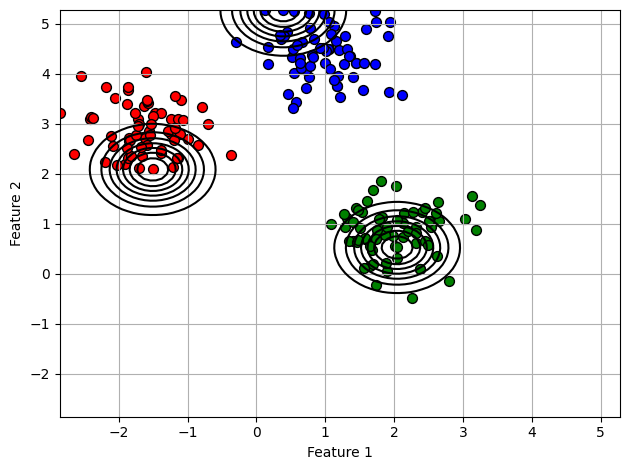

In [3]:
em = EMAlgo(X, y)
em.plot()

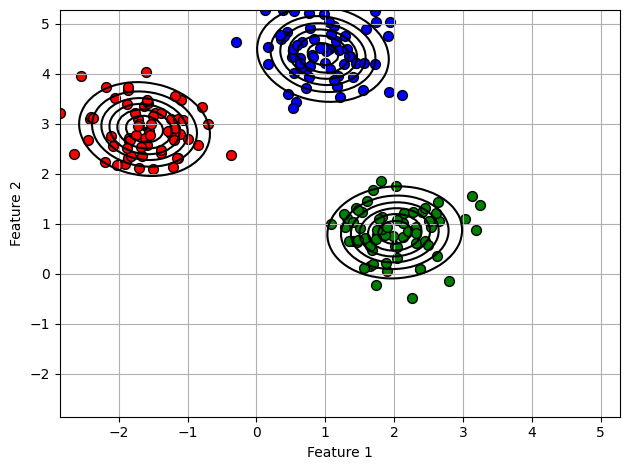

In [4]:
for i in range(10):
    em.step()
em.plot()

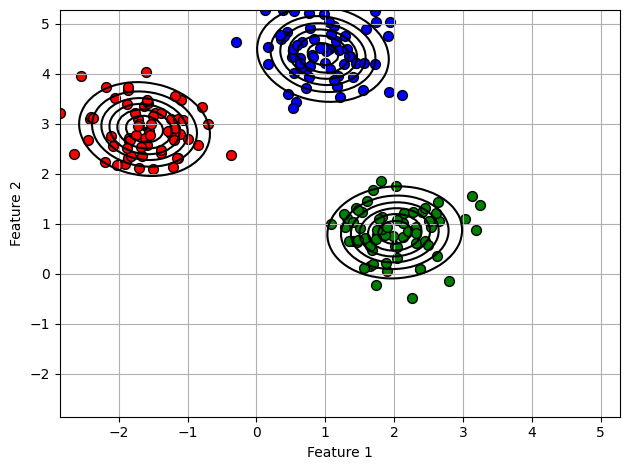

In [5]:
for i in range(10):
    em.step()
em.plot()